# The Adult dataset
The information is a replica of the notes for the abalone dataset from the UCI repository.

# 1. Title of Database: adult
# 2. Sources:
(a) Original owners of database (name/phone/snail address/email address)
US Census Bureau.
(b) Donor of database (name/phone/snail address/email address)
Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com
(c) Date received (databases may change over time without name change!)
05/19/96

# 3. Past Usage:
(a) Complete reference of article where it was described/used
@inproceedings{kohavi-nbtree,
author={Ron Kohavi},
title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid},
booktitle={Proceedings of the Second International Conference on Knowledge Discovery and Data Mining},
year = 1996,
pages={to appear}}
(b) Indication of what attribute(s) were being predicted
Salary greater or less than 50,000.
(b) Indication of study's results (i.e. Is it a good domain to use?)
Hard domain with a nice number of records.
The following results obtained using MLC++ with default settings
for the algorithms mentioned below.

# 4. Relevant Information Paragraph:
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

# 5. Number of Instances:
- 48842 instances, mix of continuous and discrete (train=32561, test=16281)
- 45222 if instances with unknown values are removed (train=30162, test=15060)
- Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

# 6. Number of Attributes:
6 continuous, 8 nominal attributes.

# 7. Attribute Information:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

# 8. Missing Attribute Values:
7% have missing values.

# 9. Class Distribution:
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)

Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

# 10. Notes for Delve
One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.

Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only 

uses cases with no missing values.

The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
missing_val = ['n/a', '?', '-']
df = pd.read_excel('adult.xlsx', na_values = missing_val)

In [246]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [247]:
df.shape

(48842, 15)

In [248]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [249]:
total_rows = len(df)
del_rows = df.isnull().any(axis = 1).sum()
print(total_rows, del_rows)

48842 3620


In [250]:
df.isnull().any(axis = 1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [251]:
df.dropna(axis = 0, how = 'any', inplace = True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [252]:
df.drop(["fnlwgt"], axis = 1 , inplace = True)


In [253]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [254]:
current_rows = len(df)
print(current_rows)

45222


In [255]:
print('Percentage of deleted number of rows:',100*(del_rows/total_rows),'%')

Percentage of deleted number of rows: 7.411653904426519 %


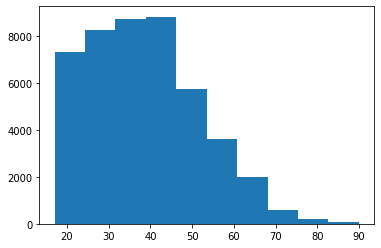

In [256]:
plt.hist(df['age'])
plt.show()

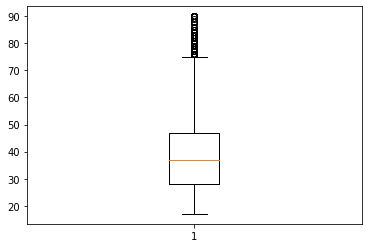

In [257]:
plt.boxplot(df['age'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text xticklabel objects>)

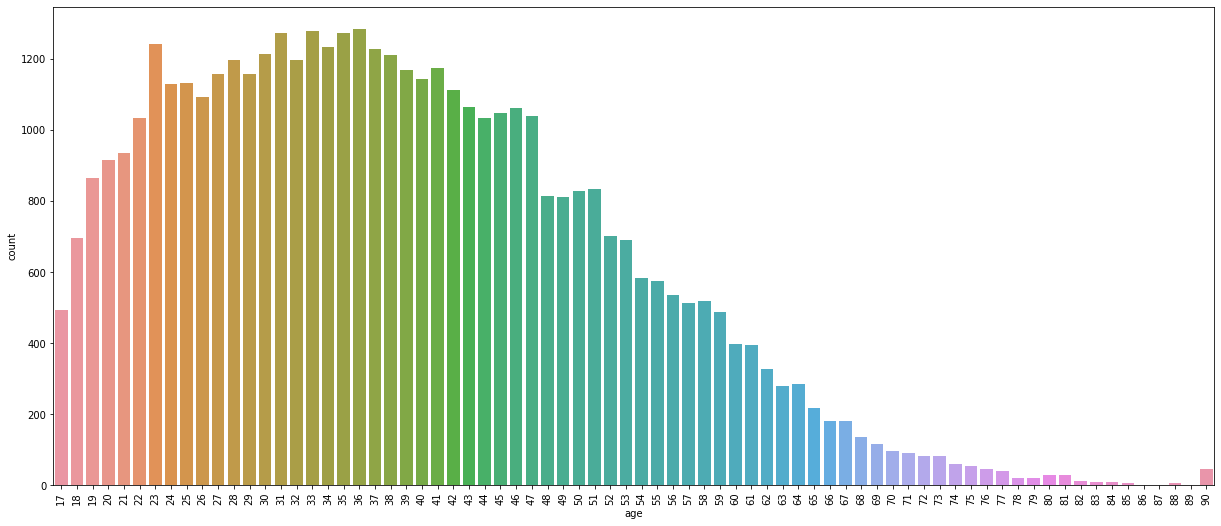

In [258]:
plt.figure(figsize = (20.8,8.8))
sns.countplot(df['age'])
plt.xticks(rotation = 90)

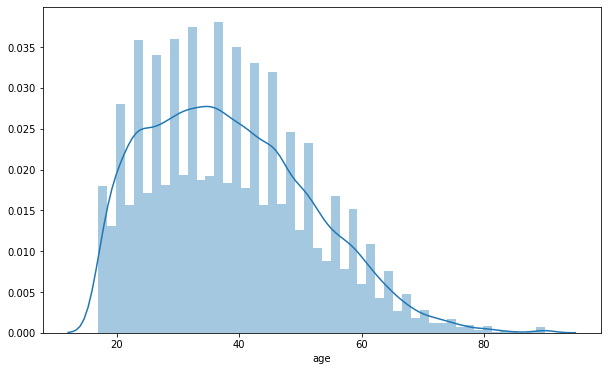

In [259]:
plt.figure(figsize = (10, 6))
sns.distplot(df['age'], hist = True, rug = False)

<b>Observation</b>
1. Max strength belongs to age 20 - 45.
2. Outliers are from age 76 - 90.
3. Max strength are of age 36.

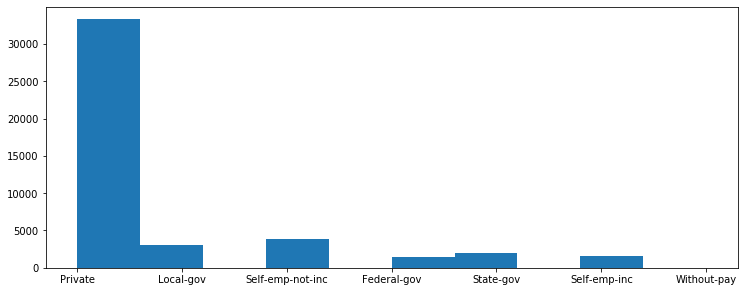

In [260]:
plt.figure(figsize = (12.4, 4.8))
plt.hist(df['workclass'])
plt.show()

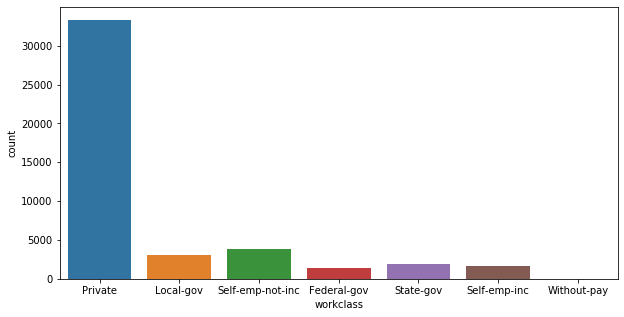

In [261]:
plt.figure(figsize = (10, 5))
sns.countplot(df['workclass'])


<b> Observation</b>
1. Max strength belongs to private sector.
2. Rest all others are nearby same.

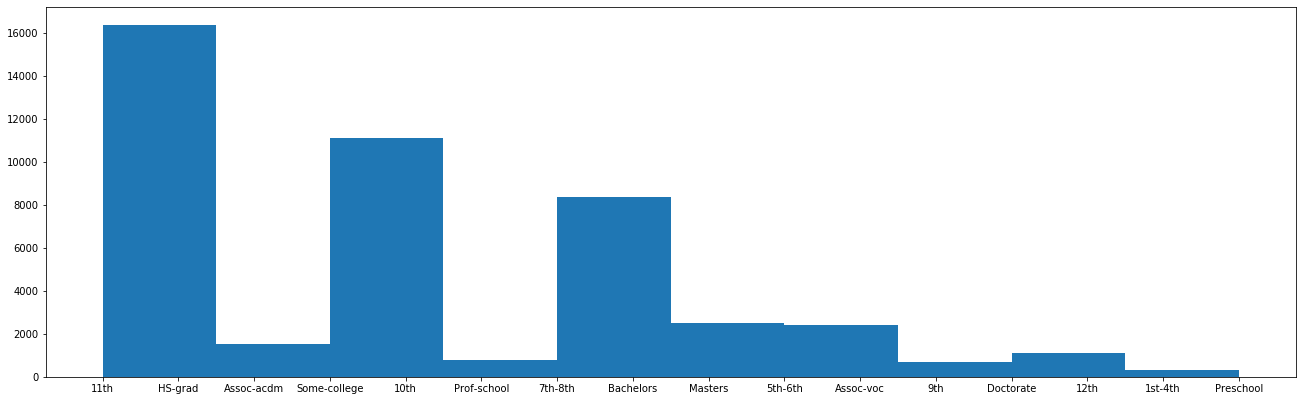

In [262]:
plt.figure(figsize = (22.4, 6.8))
plt.hist(df['education'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

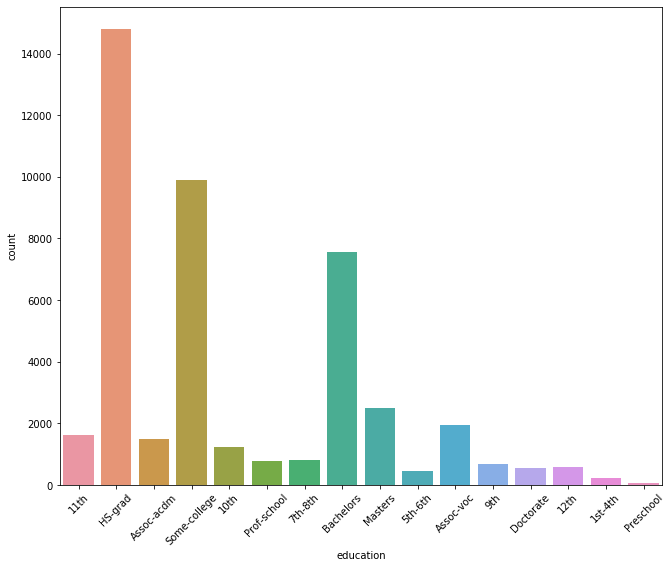

In [263]:
plt.figure(figsize = (10.8,8.8))
sns.countplot(df['education'])
plt.xticks(rotation = 45)

<b> Observation</b>
1. Max strength is of'HS-grad' followed by 'Bachelors' and 'Same College'.
2. Min strength is of 'pre school'.

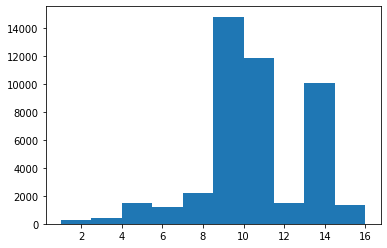

In [264]:
plt.hist(df['educational-num'])
plt.show()

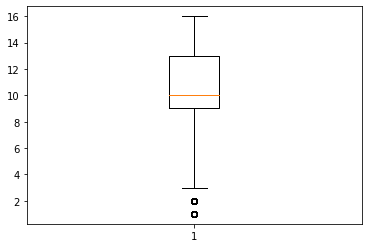

In [265]:
plt.boxplot(df['educational-num'])
plt.show()

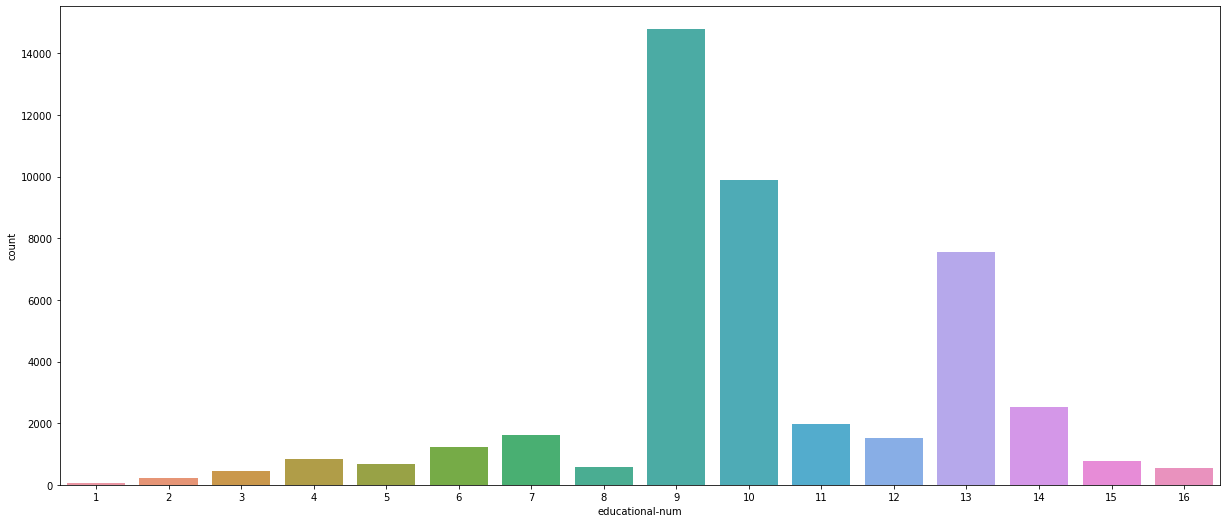

In [266]:
plt.figure(figsize = (20.8,8.8))
sns.countplot(df['educational-num'])

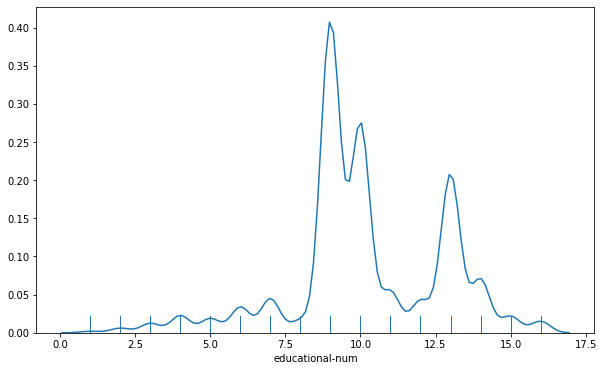

In [267]:
plt.figure(figsize = (10, 6))
sns.distplot(df['educational-num'], hist = False, rug = True)

<b> Observation </b>
1. Max Strength : 9 ,10, 13.
2. Min strength : 1, 2.
3. Outliers : 0.5 - 2.

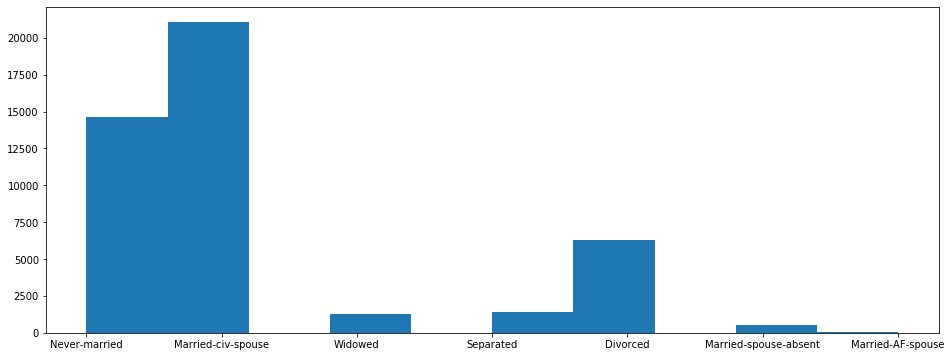

In [268]:
plt.figure(figsize = (16, 6))
plt.hist(df['marital-status'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

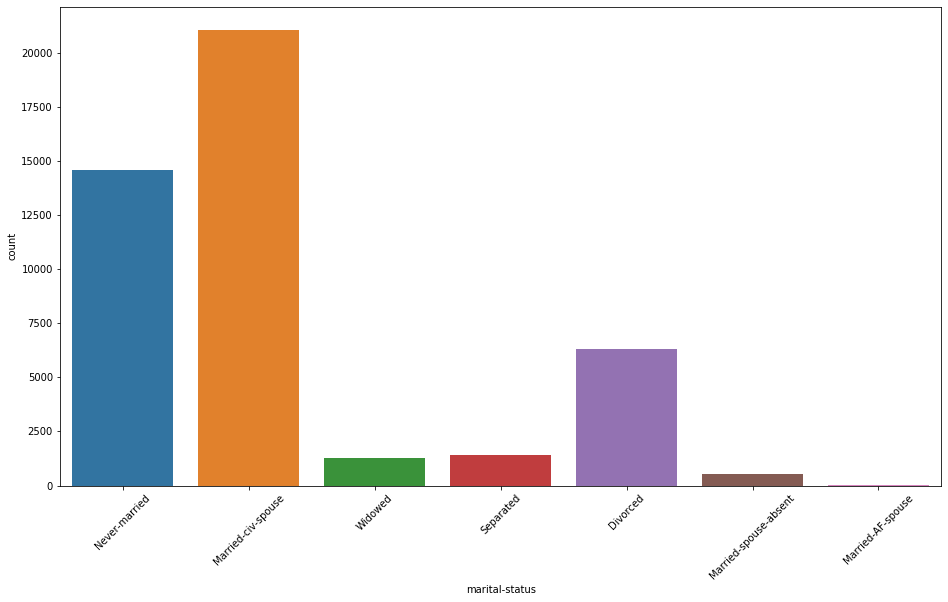

In [269]:
plt.figure(figsize = (15.8,8.8))
sns.countplot(df['marital-status'])
plt.xticks(rotation = 45)

<b> Observation </b>
1. Max Strength : Never-Married, Married-civ-spouse.
2. Min Strength : Married-spouse-absent, widowed, seprated.

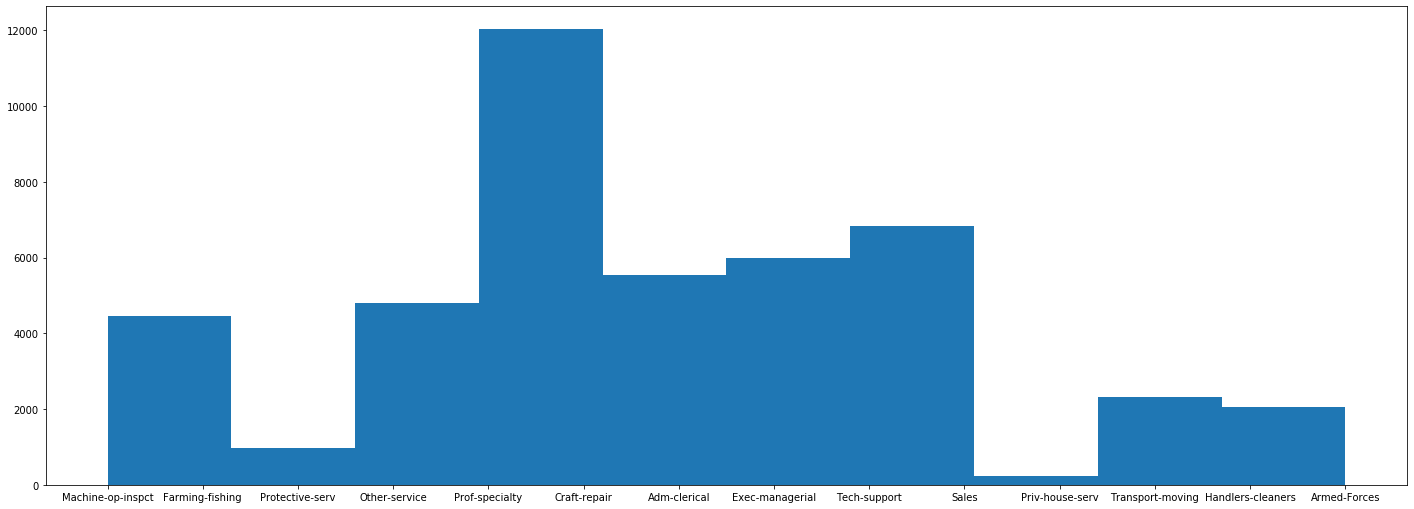

In [270]:
plt.figure(figsize = (24.4,8.8))
plt.hist(df['occupation'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

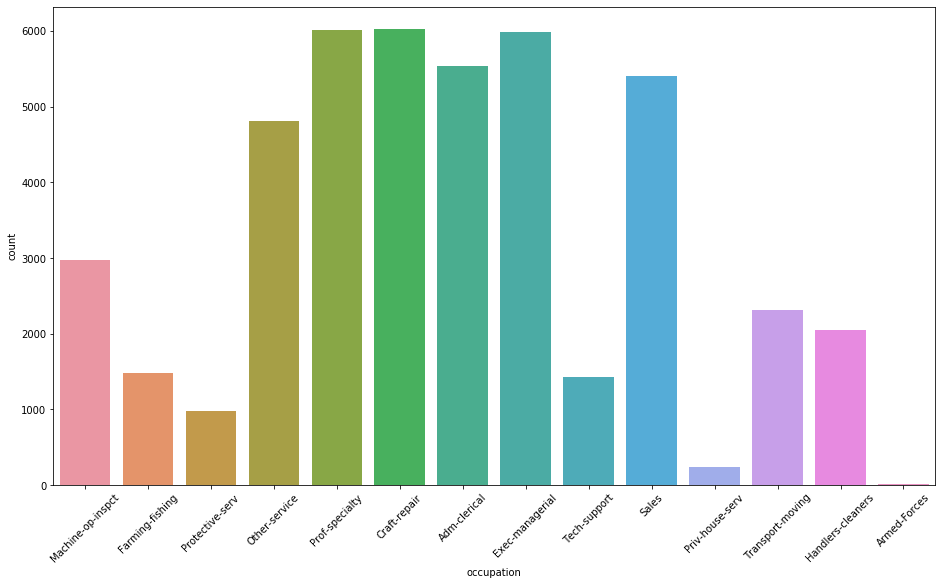

In [271]:
plt.figure(figsize = (15.8,8.8))
sns.countplot(df['occupation'])
plt.xticks(rotation = 45)

<b> Occupation </b>
1. Max Strength: Prof-speciality and craft repair.
2. Min Strength: Priv-house-serv.

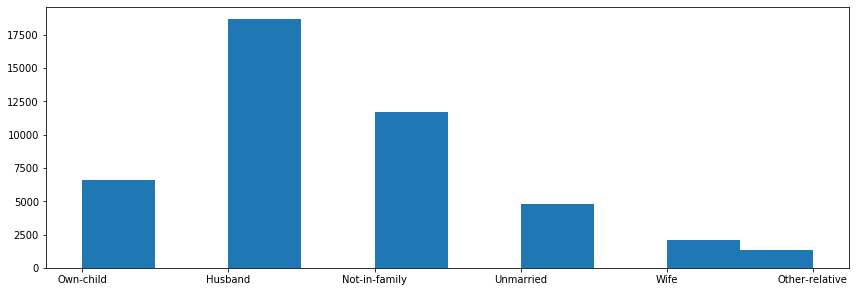

In [272]:
plt.figure(figsize = (14.4,4.8))
plt.hist(df['relationship'])
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

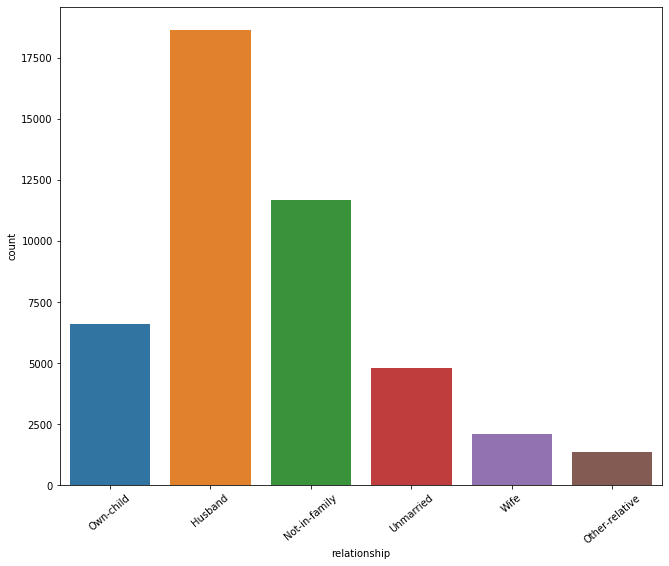

In [273]:
plt.figure(figsize = (10.8,8.8))
sns.countplot(df['relationship'])
plt.xticks(rotation = 40)

<b> Relationship </b>
1. Max Strength: Husband.
2. Min Strength: Other relative.

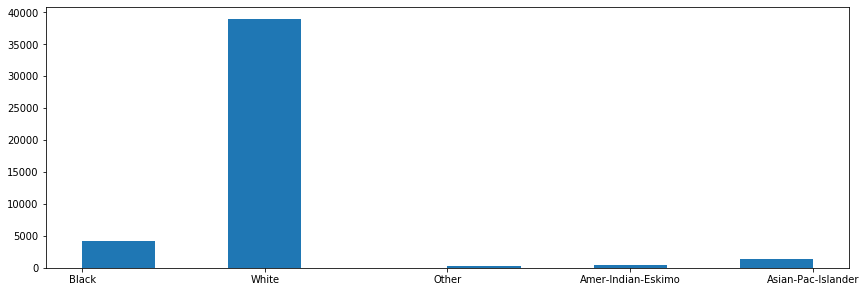

In [274]:
plt.figure(figsize = (14.4,4.8))
plt.hist(df['race'])
plt.show()

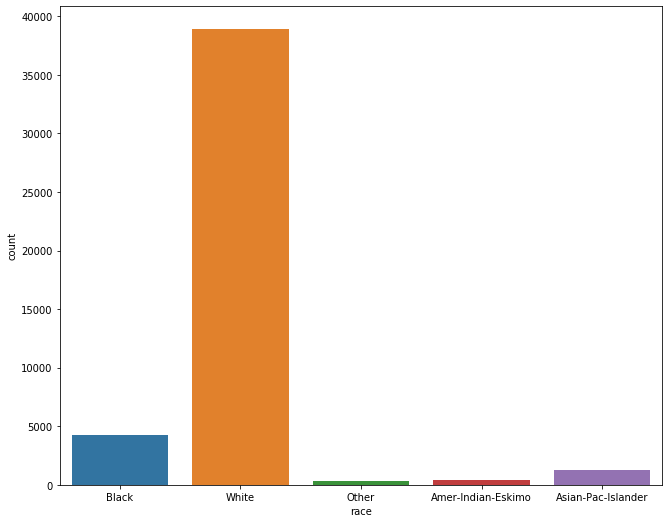

In [275]:
plt.figure(figsize = (10.8,8.8))
sns.countplot(df['race'])


<b> Race </b>
1. Max Strength: White.
2. Min Strength: Other race and Amer-indian-askimo.

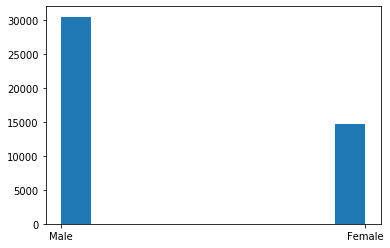

In [276]:
plt.hist(df['gender'])
plt.show()

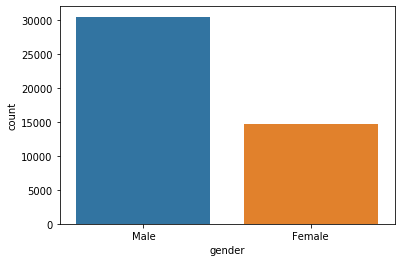

In [277]:
sns.countplot(df['gender'])


<b> Gender </b>
1. Max Strength: Male.
2. Min Strength: Female.

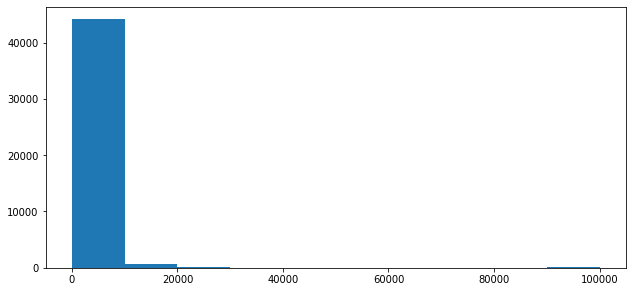

In [278]:
plt.figure(figsize = (10.4,4.8))
plt.hist(df['capital-gain'])
plt.show()

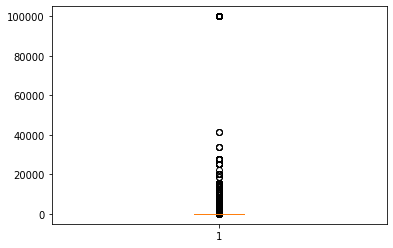

In [279]:
plt.boxplot(df['capital-gain'])
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]), <a list of 121 Text xticklabel objects>)

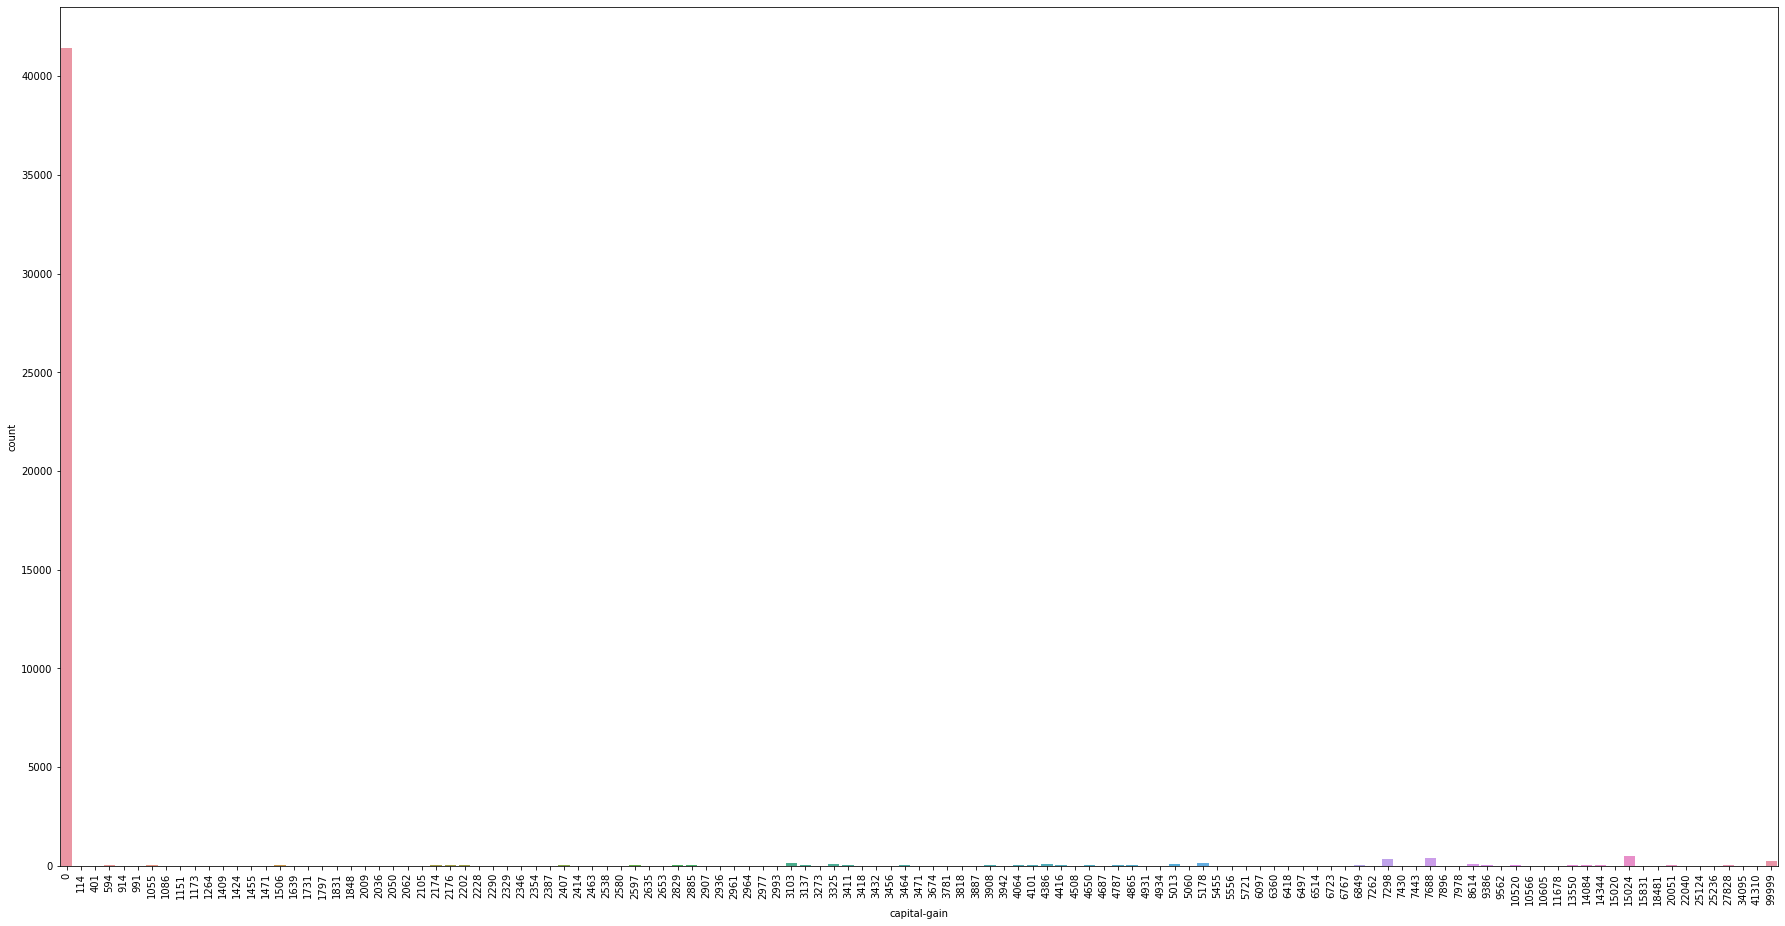

In [280]:
plt.figure(figsize = (30.8,15.8))
sns.countplot(df['capital-gain'])
plt.xticks(rotation = 90)

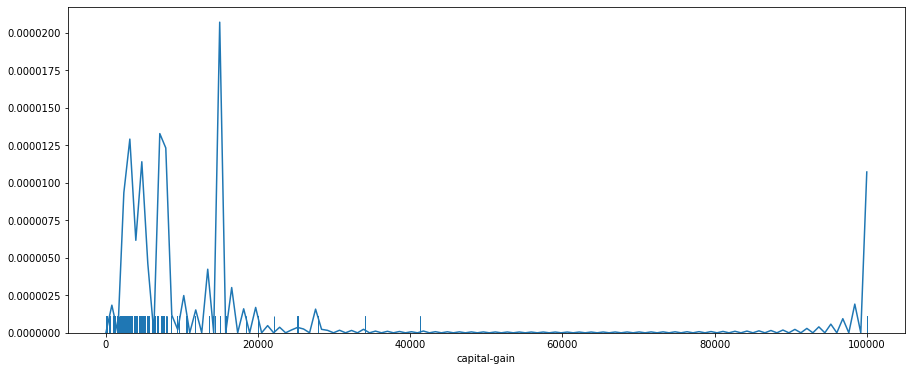

In [281]:
plt.figure(figsize = (15, 6))
sns.distplot(df['capital-gain'], hist = False, rug = True)

<b> Captital-Gain</b>
1. Max Strength: 0.000200
2. Min Strength: 20,000, 90,000.

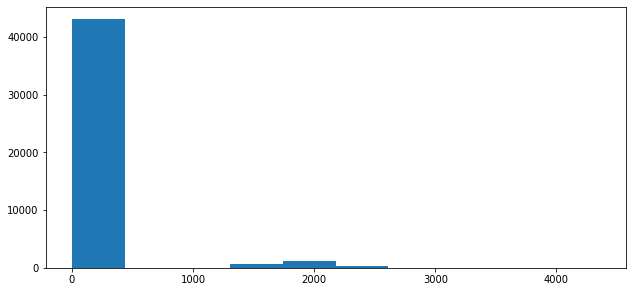

In [282]:
plt.figure(figsize = (10.4,4.8))
plt.hist(df['capital-loss'])
plt.show()

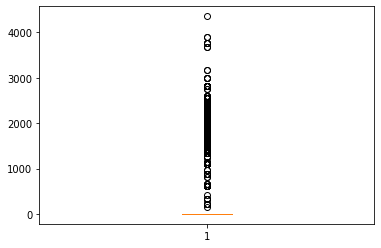

In [283]:
plt.boxplot(df['capital-loss'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text xticklabel objects>)

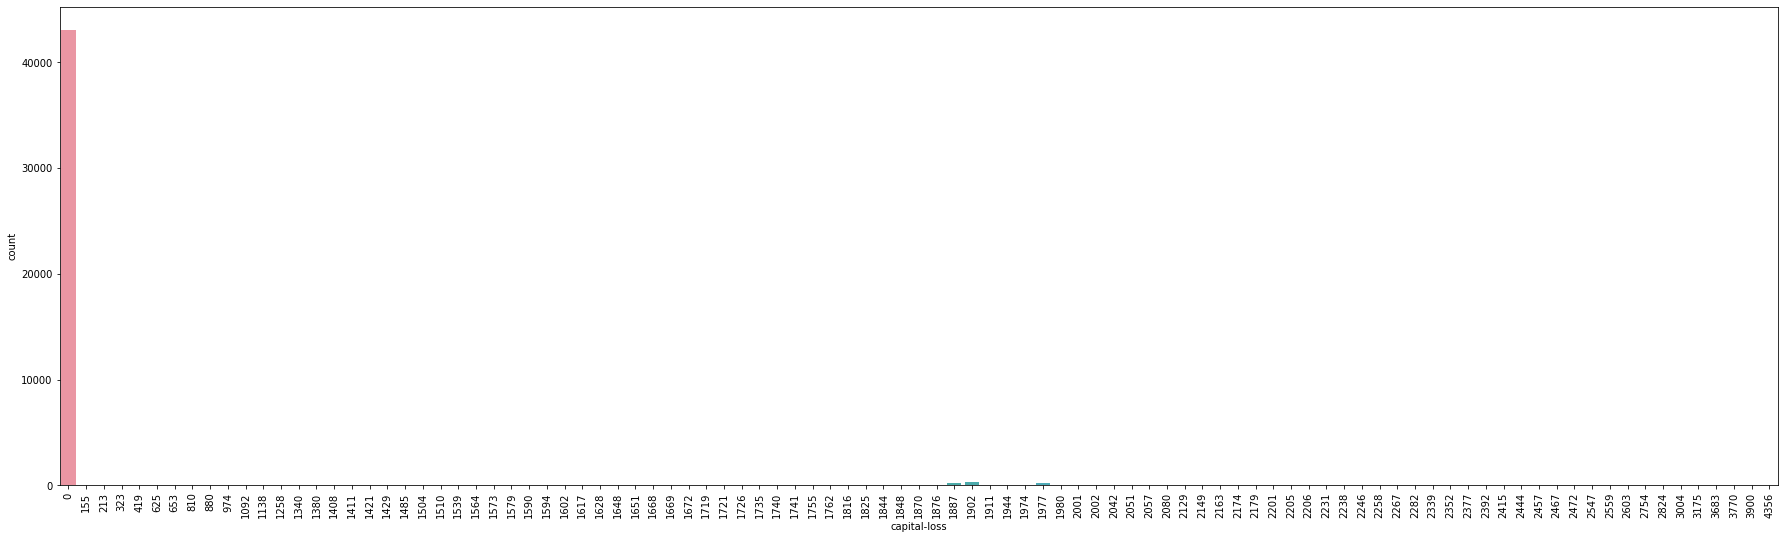

In [284]:
plt.figure(figsize = (30.8,8.8))
sns.countplot(df['capital-loss'])
plt.xticks(rotation = 90)

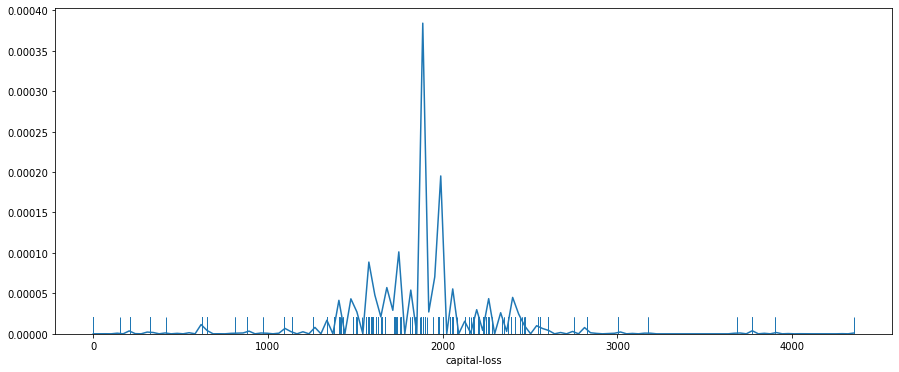

In [285]:
plt.figure(figsize = (15, 6))
sns.distplot(df['capital-loss'], hist = False, rug = True)

<b> Capital-loss </b>
1. Max Strength: 0.00038.
2. Min Strength: 1500, 2500.

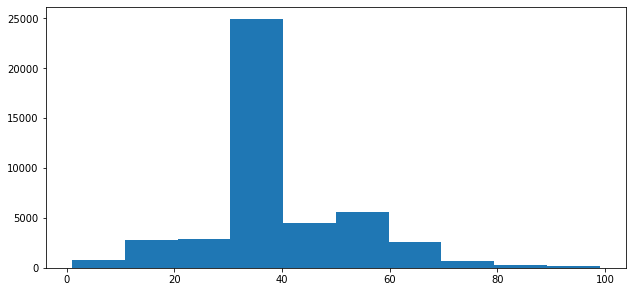

In [286]:
plt.figure(figsize = (10.4,4.8))
plt.hist(df['hours-per-week'])
plt.show()

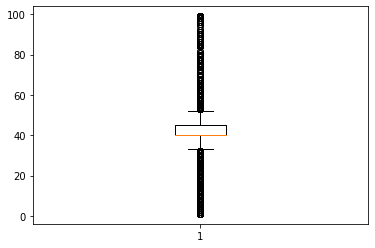

In [287]:
plt.boxplot(df['hours-per-week'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

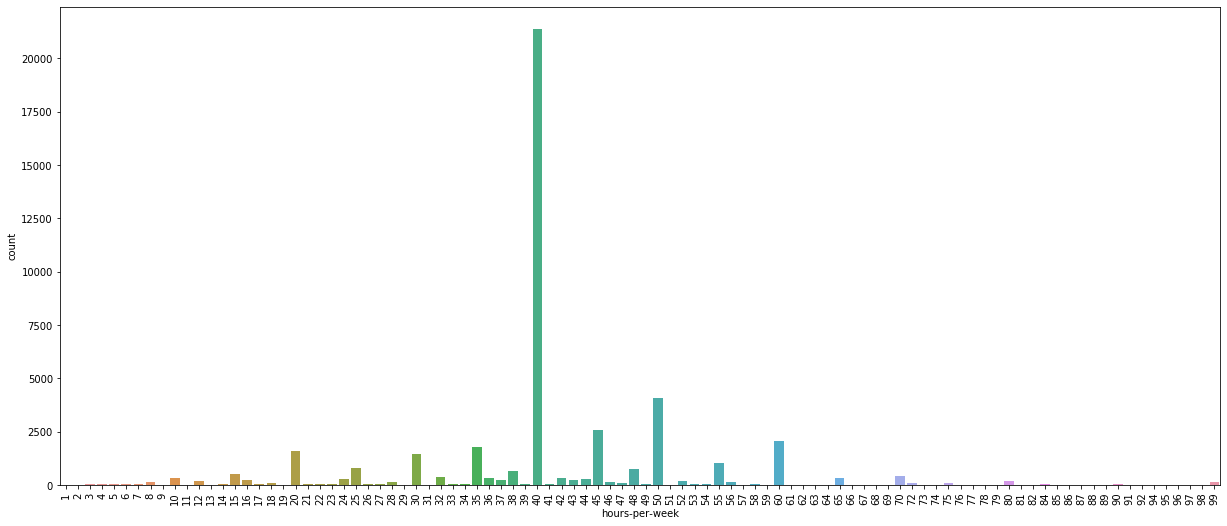

In [288]:
plt.figure(figsize = (20.8,8.8))
sns.countplot(df['hours-per-week'])
plt.xticks(rotation = 90)

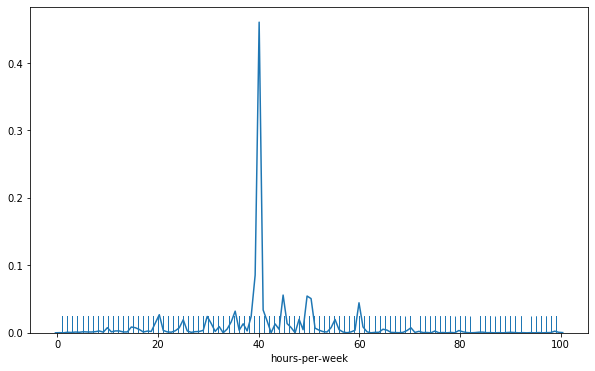

In [289]:
plt.figure(figsize = (10, 6))
sns.distplot(df['hours-per-week'], hist = False, rug = True)

<b> hours-per-week </b>
1. Max Strength: 40.
2. Min Strength: 80-90.

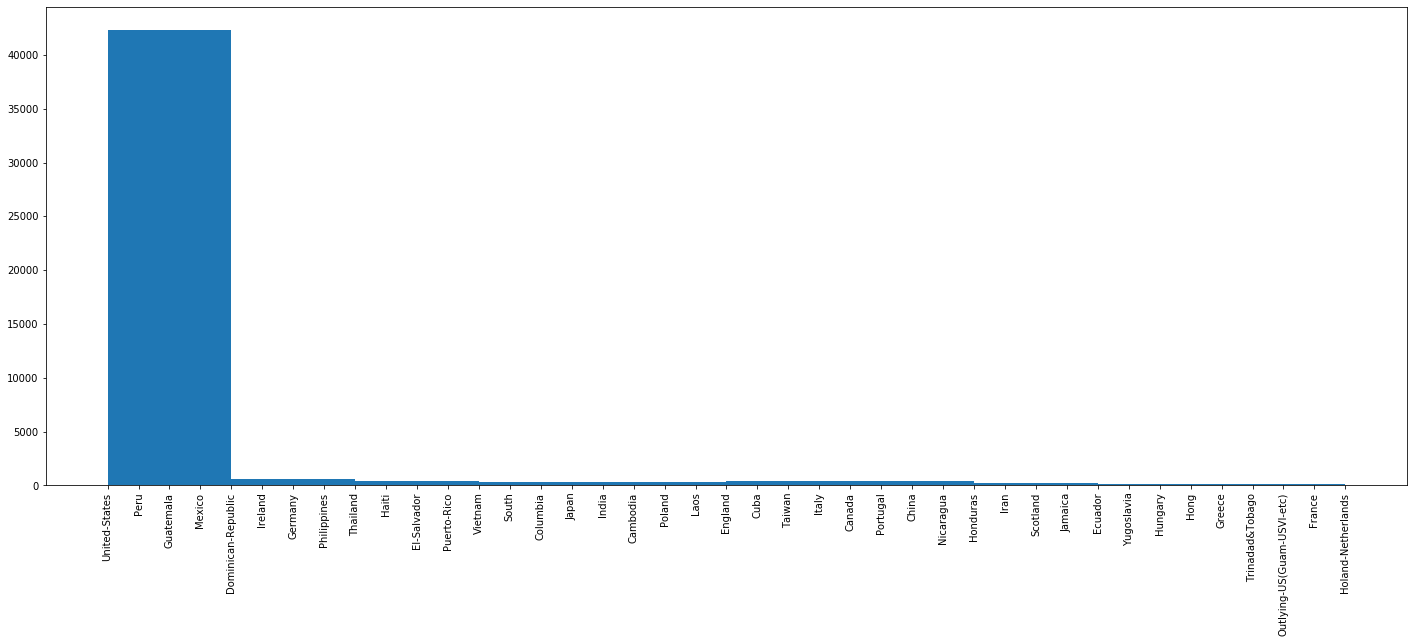

In [290]:
plt.figure(figsize = (24.4,8.8))
plt.hist(df['native-country'])
plt.xticks(rotation = 90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

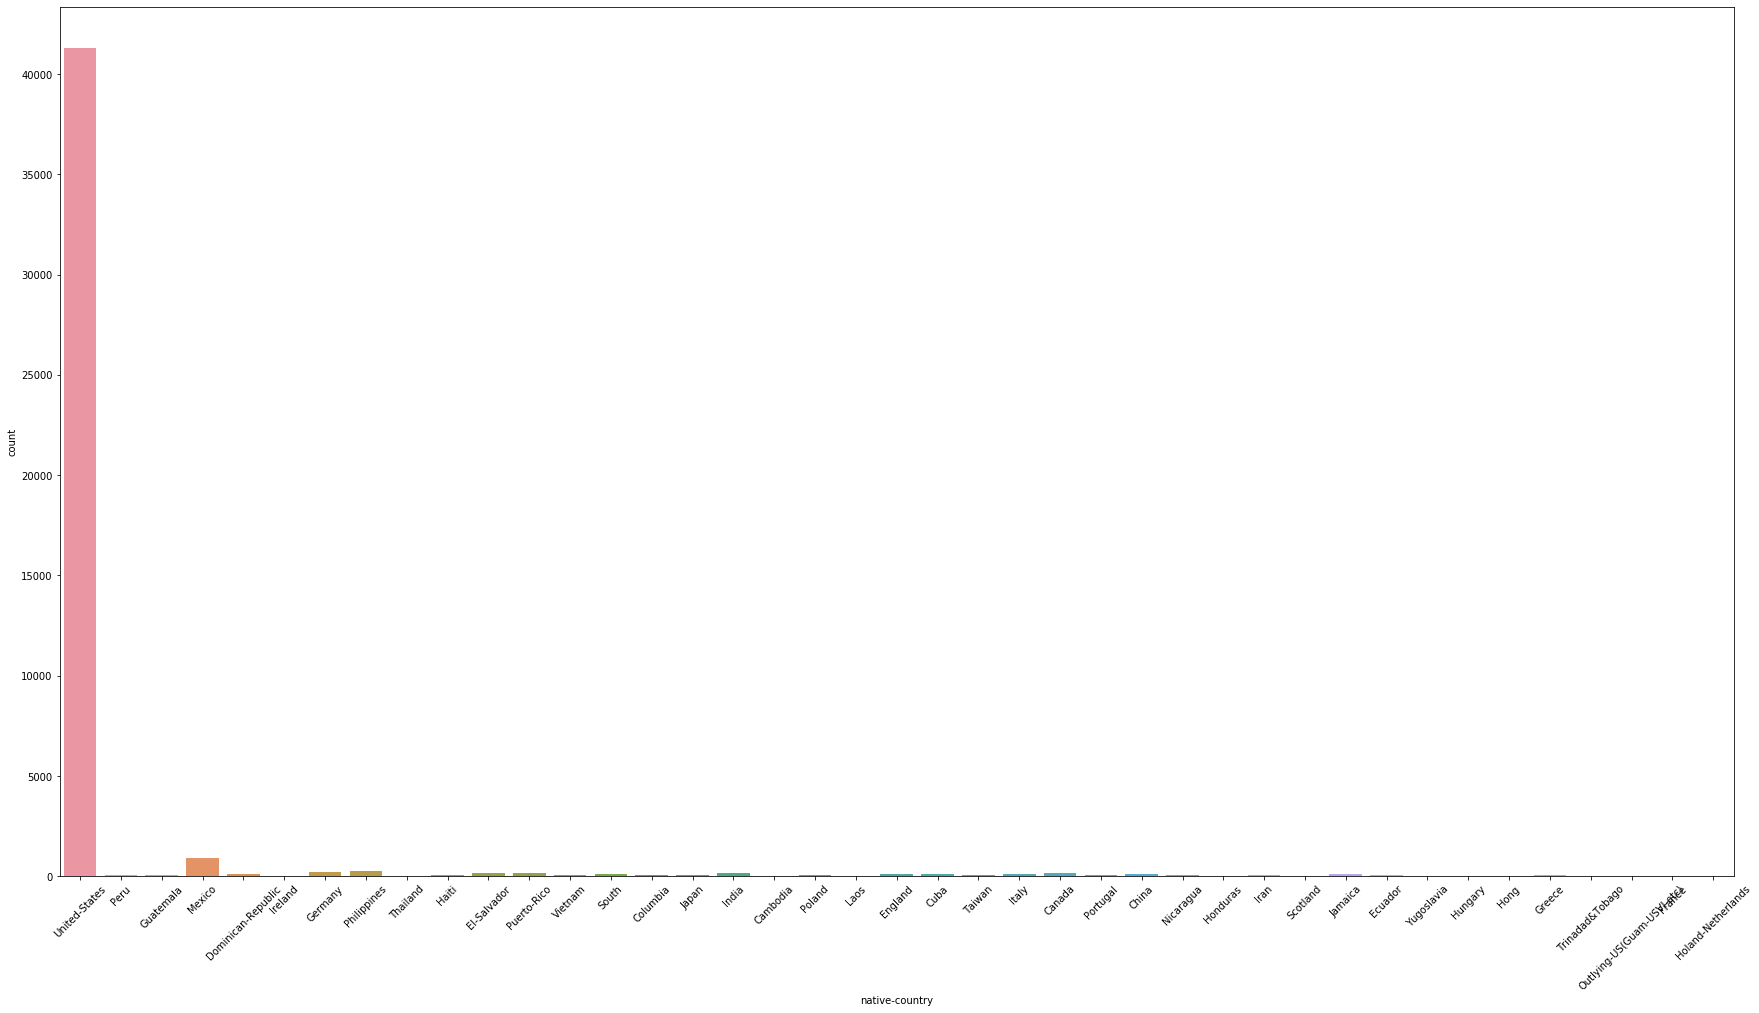

In [291]:
plt.figure(figsize = (30, 16))
sns.countplot(df['native-country'])
plt.xticks(rotation = 45)

<b> native-country </b>
1. Max Strength: United States.
2. Min Strength: Iran, Scotland, Jamaica, Ecuador.
    

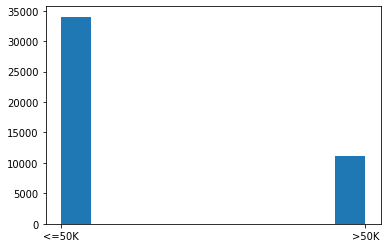

In [292]:
plt.hist(df['income'])
plt.show()

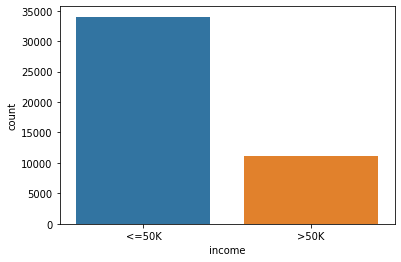

In [293]:
sns.countplot(df['income'])


<b> Income </b>
1. Max Strength: <=50k.
2. Min Strength: >=50k.

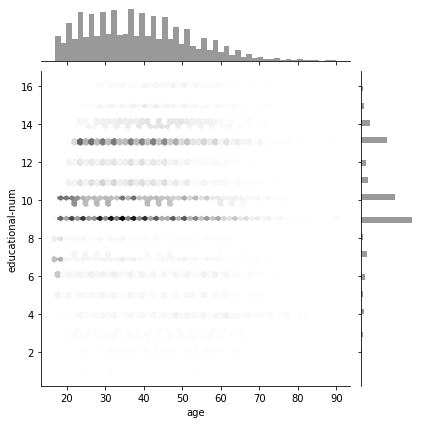

In [294]:
sns.jointplot(x = 'age', y = 'educational-num', data = df, kind = 'hex', color = 'k')


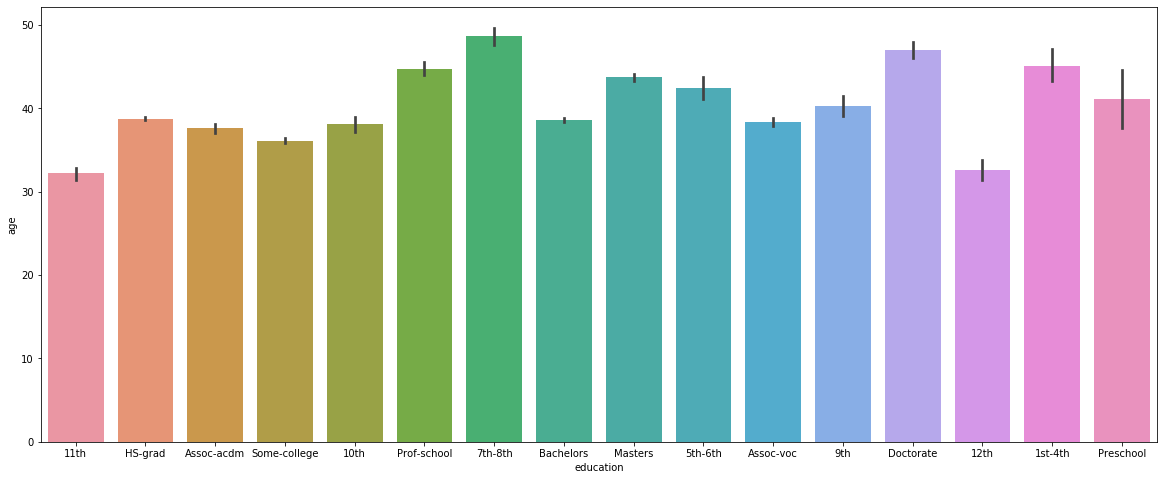

In [295]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'education', y = 'age', data = df)

<b> Age Vs Education</b>
1. People above 40yrs are generally belongs to 'prof-school', '7th-8th', 'Masters', '5th-6th', '9th', 'Doctorate', '1st-4th', 'Pre-school'.

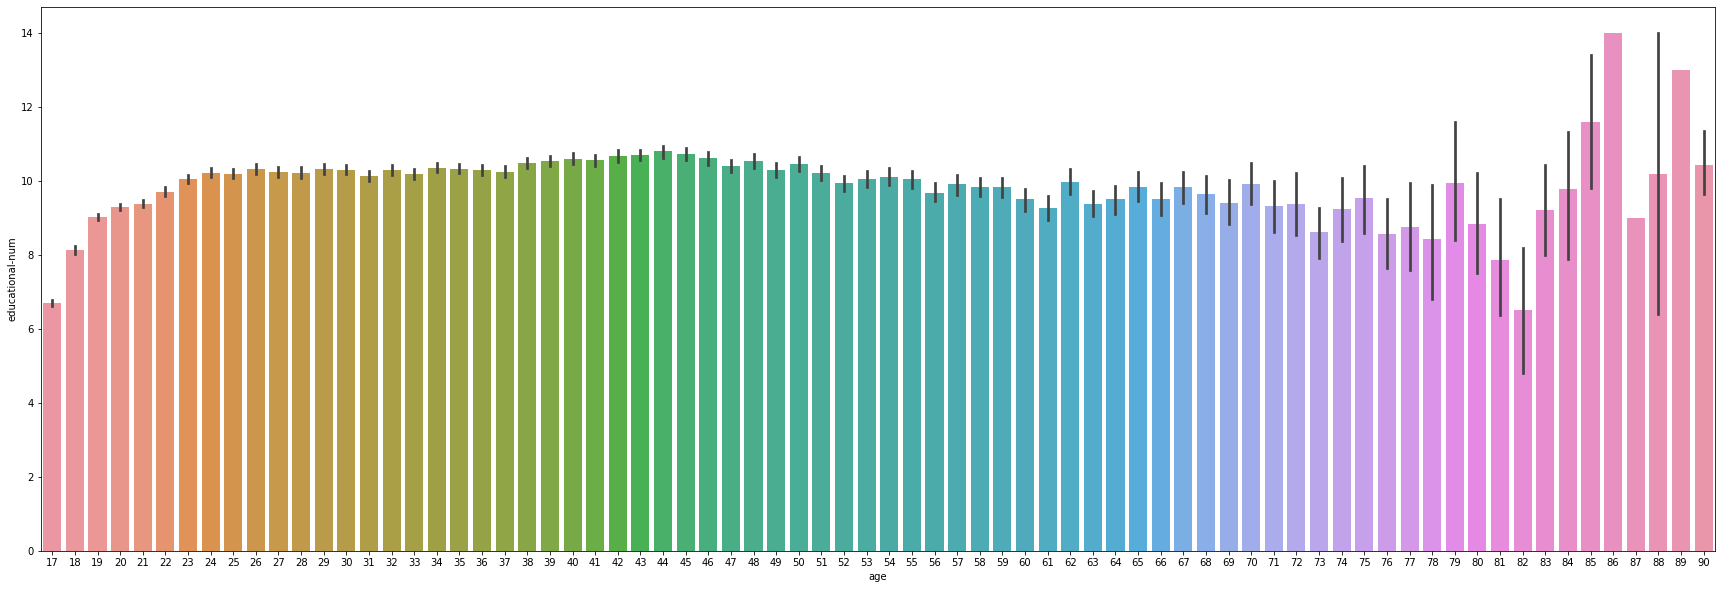

In [296]:
plt.figure(figsize = (30, 10))
sns.barplot(x = 'age', y = 'educational-num', data = df)

<b> Age Vs Educational-num. </b>
1. People of age 86 have max educational-num of approx 13.7.
2. People of age above 17 and 83 have very less educational-num of approx 6.8.

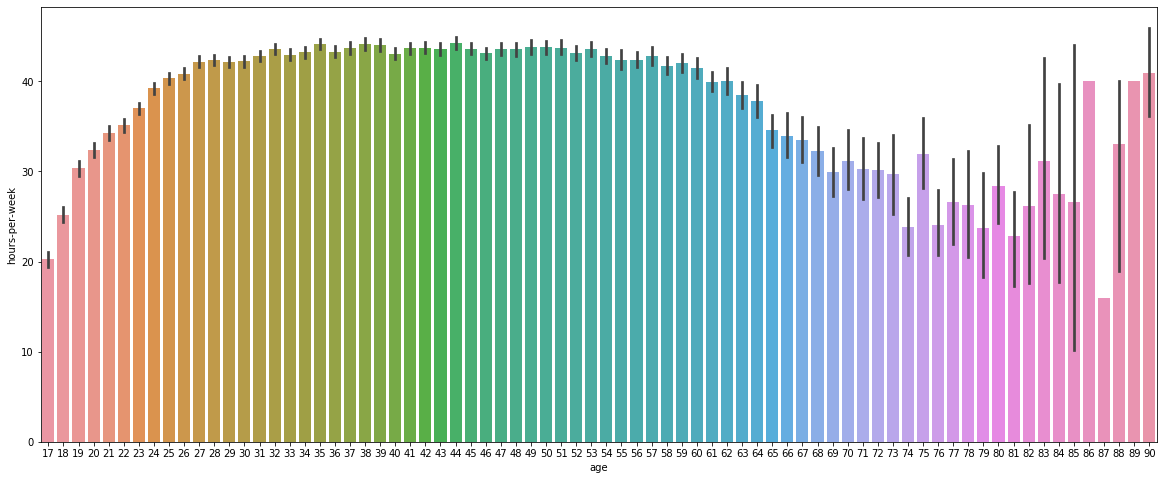

In [297]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'age', y = 'hours-per-week', data = df)

<b> Age Vs Hours-per-week </b>
1. People of age 25-60 works maximum in a week of more than 40hours per week.

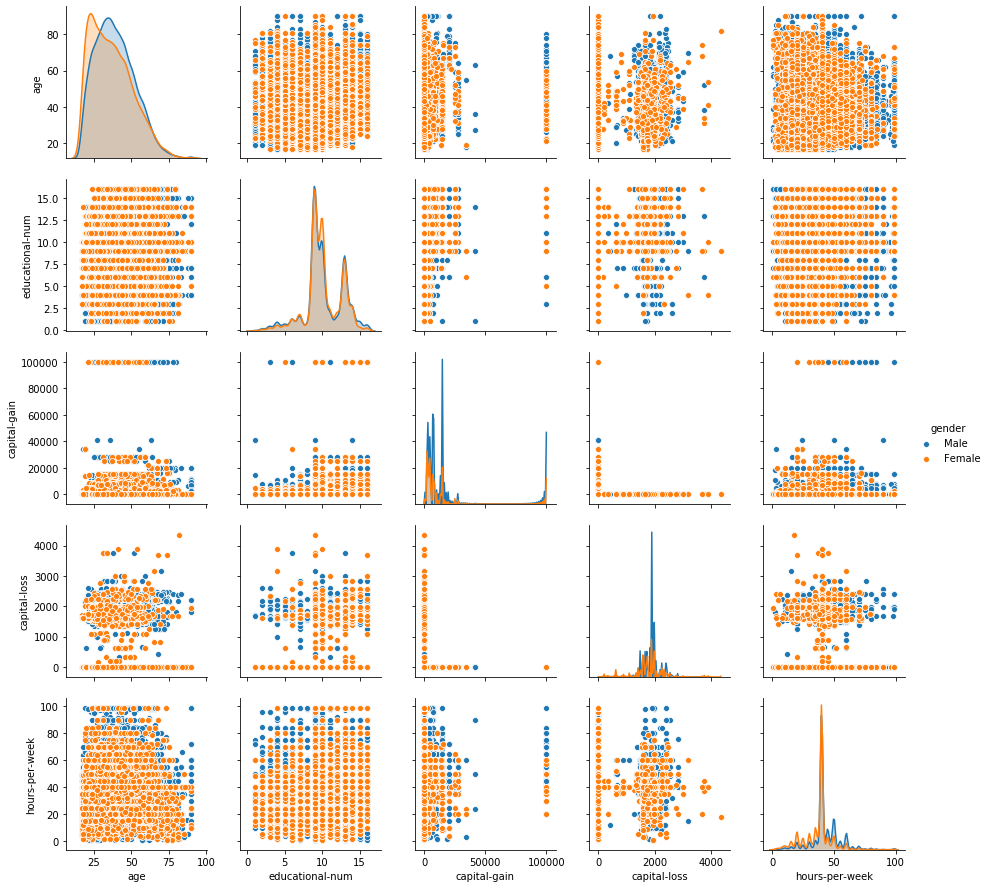

In [298]:
sns.pairplot(df, hue = 'gender')

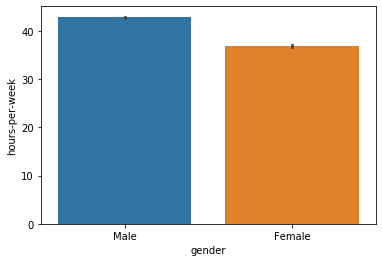

In [299]:
sns.barplot(x = 'gender', y = 'hours-per-week', data = df)

<b> Gender Vs Hours-per-week</b>
1. Male works more than female for hours per week.

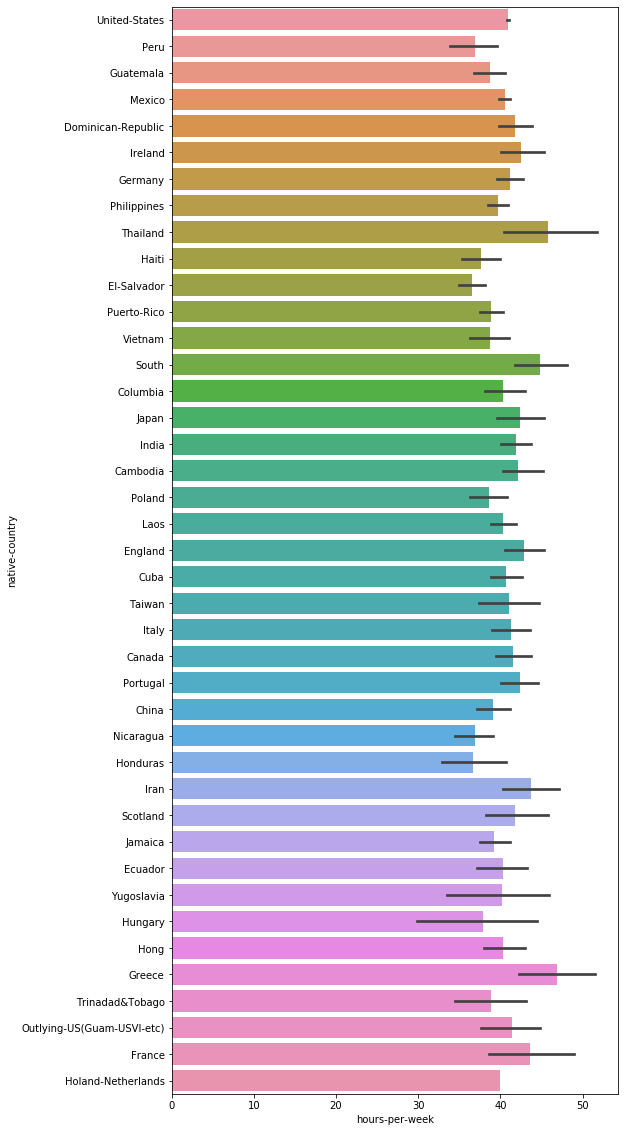

In [300]:
plt.figure(figsize = (8, 20))
sns.barplot(x = 'hours-per-week', y = 'native-country', data = df)

<b> Native-country Vs hours-per-week </b>
1. People from Thailand, Iran, South and Greece works more hours per week than people from other countries.

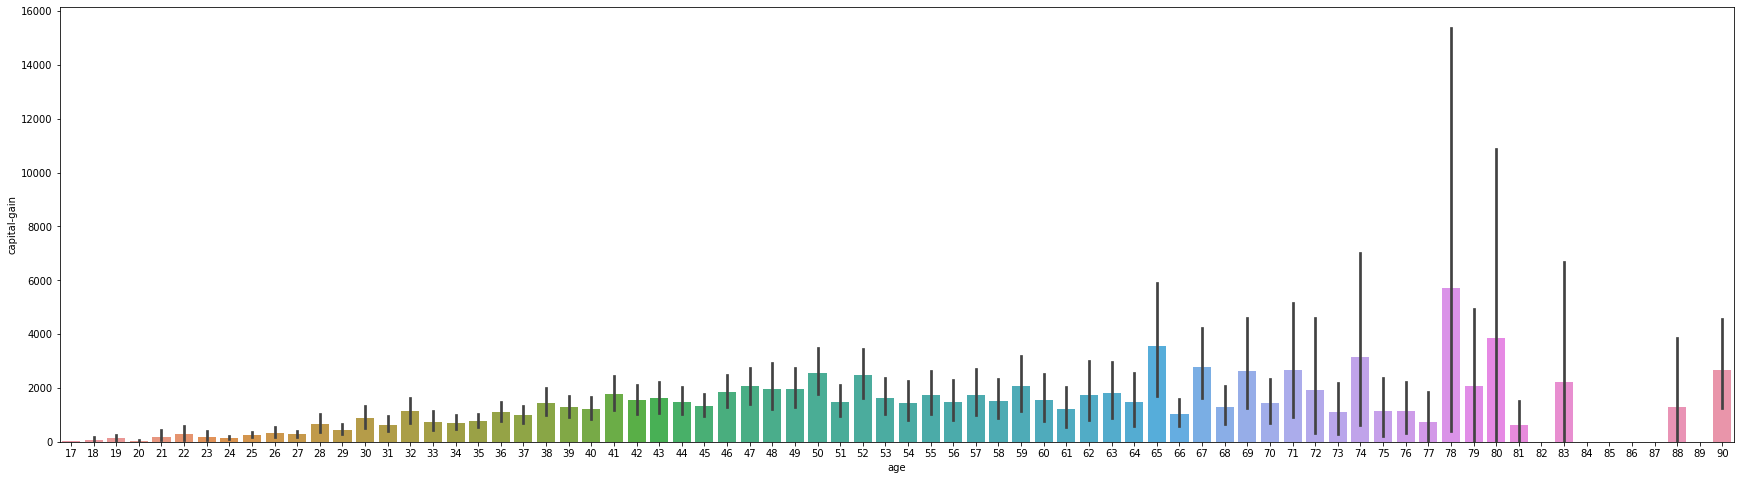

In [301]:
plt.figure(figsize = (30, 8))
sns.barplot(x = 'age', y = 'capital-gain', data = df)

<b> Age Vs Capital-gain </b>
1. People of age 78 have maximum capital gain of 6000.
2. people of age between 17-25 and 84- 85 have minium capital gain between 0-500.

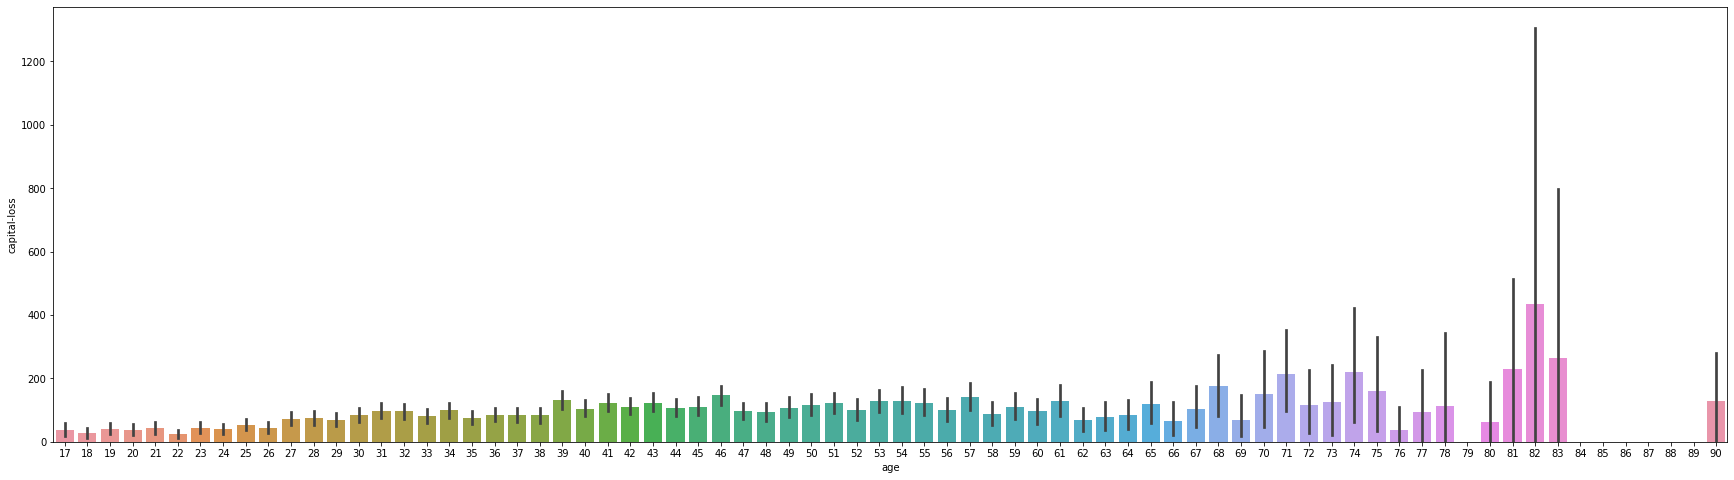

In [302]:
plt.figure(figsize = (30, 8))
sns.barplot(x = 'age', y = 'capital-loss', data = df)

<b> Age Vs Capital-loss </b>
1. People of age 80-83 have maximum capital-loss between 300-400.

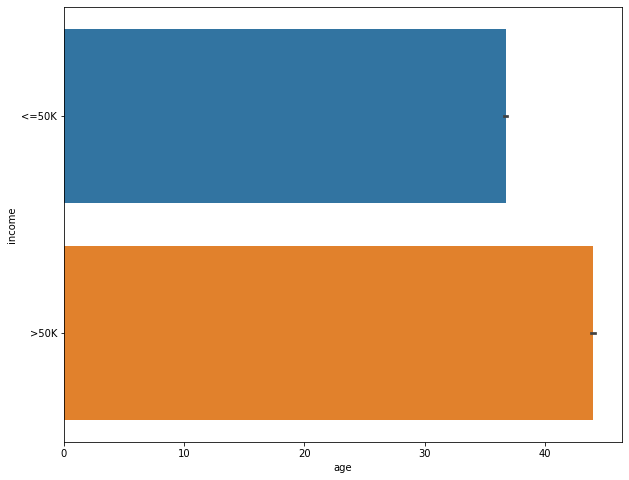

In [303]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'age', y = 'income', data = df)

<b> Age Vs Income </b>
1.  People with age > 35 have income >50k.

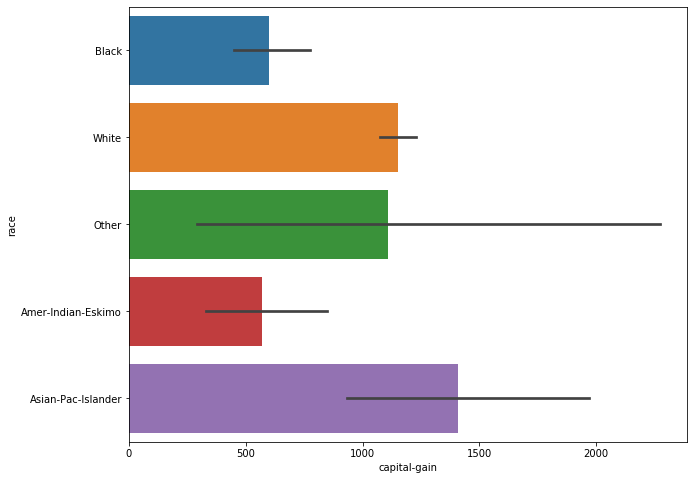

In [304]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'capital-gain', y = 'race', data = df)

<b> Race Vs Capital-gain </b>
1. People of Asian-Pac-Islander have more capital-gain upto 1400.

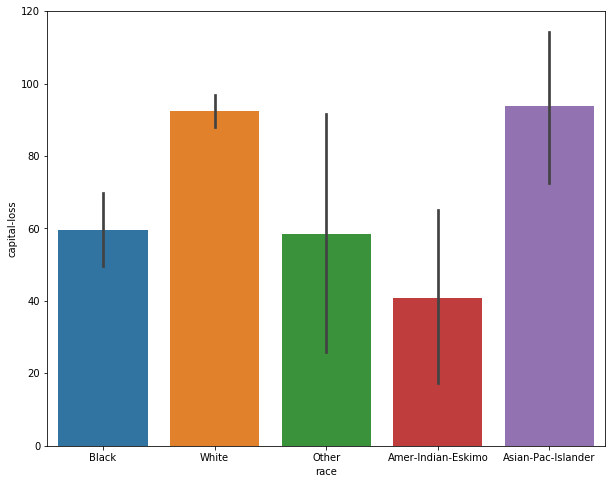

In [305]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'race', y = 'capital-loss', data = df)

<b> Race Vs Capital-loss </b>
1. People belongs to Asian-Pac-Islander and White have max capital-loss upto 90.

# Conclusions:
1. Max people in the dataset belongs to age 36.
2. Max people belongs to private sector.
3. Max strength is of'HS-grad' followed by 'Bachelors' and 'Same College'.
4. Max Strength of marital-status:  Never-Married, Married-civ-spouse.
5. Max Strength of occupation : Prof-speciality and craft repair.
6. Max Strength of relationship: Husband.
7. Max Strength of gender: Male.
8. Max strength of people of capital-gain: 0.000200
9. Max strength of people of capital-loss: 0.00038.
10. Max Strength of people of native country: United States.
11. Max strength of people working for hours-per-week: 40.
12. Max strength of people of race : White.
13. Max strength of people have income: <=50k.

In [306]:
from sklearn.preprocessing import MinMaxScaler


In [307]:
col = []
for i in df:
    if df[i].dtype == 'int64':
        col.append(i)
    scalar = MinMaxScaler()
    df[col] = scalar.fit_transform
    (df[col])

In [308]:
workclass = pd.get_dummies(df['workclass'], drop_first = True)

In [309]:
workclass = pd.get_dummies(df['education'], drop_first = True)

In [310]:
workclass = pd.get_dummies(df['marital-status'], drop_first = True)

In [311]:
workclass = pd.get_dummies(df['occupation'], drop_first = True)

In [312]:
workclass = pd.get_dummies(df['relationship'], drop_first = True)

In [313]:
workclass = pd.get_dummies(df['race'], drop_first = True)

In [314]:
workclass = pd.get_dummies(df['native-country'], drop_first = True)

In [315]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()

In [316]:
male = scaler.fit_transform(df.gender)
male_col = pd.DataFrame(male, columns = ['Male'])

In [317]:
income = scaler.fit_transform(df.income)
income_col = pd.DataFrame(male, columns = ['>50k'])

In [324]:
obj = []
for i in df:
    if df[i].dtype == "object":
        obj.append(i)

In [327]:
df = pd.concat([workclass, education, marital_status, occupation, relationship, race, native_country], axis = 1)
df = df.reset_index(drop = True, inplace = False)
df = pd.concat([df, male_col, income_col], axis = 1)

NameError: name 'education' is not defined